# A first look at Neural Network

We will use the dataset MNSIT to build a little neural network to clasify images of digits (28px * 28px).

## 1. Anatomy of a neural network

### 1.1 - Load the dataset

In [330]:
# imports
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

In [331]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape

(60000, 28, 28)

__We divide our dataset into small batches :__

It permit us to don't process the entire dataset at once.

In [332]:
batch_size = 20
batch_start = 400

# train_image is a (nbr_image, length, width) 
# and we want to select the batch_start to batch_start + batch_size images
inputs = train_images[batch_start : batch_start + batch_size, :, :]
labels = train_labels[batch_start : batch_start + batch_size]

# display images :
fig = px.imshow(np.hstack([inputs[i,:,:] for i in range(inputs.shape[0])]))

fig.update_layout(
    title="Inputs",
)
fig.show()
print(labels)

[2 6 4 5 8 3 1 5 1 9 2 7 4 4 4 8 1 5 8 9]


### 1.2 - Network layers

We will use a linear stack of layers. We will create two __Dense layers__

We want in the output the probability that the image is activated on one of our 10 classes, so we implement our last Dense layer as a 'softmax' (multiclass) to 10-way

We add in first a 512-dimensional ReLU layer to "dilate" our data

In [333]:
image_size = train_images.shape[1:3]
img_size = image_size[0] * image_size[1]

nbr_image_train = train_images.shape[0]
nbr_image_test = test_images.shape[0]


In [334]:
network = models.Sequential()
network.add(layers.Dense(512, activation = 'tanh', input_shape = (img_size,))) 
network.add(layers.Dense(10, activation = 'softmax'))

### 1.3 - Loss function and optimizer

We have a 10-class classification problem so we choose a __categorial cross entropy loss function__

We will us an ADAM optimizer for his optimization to the stochastic gradient descend algorithm

In [335]:
network.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

### 1.4 - Training

Before traning our network, we nned to resize our image because the input shape of our first layer is (60000, 28*28)

In [336]:
train_images_r = train_images.reshape((nbr_image_train, img_size))
test_images_r = test_images.reshape((nbr_image_test, img_size))

We also need to scale our data to get values between [0,1] instead [0,256]

In [337]:
train_images_final = train_images_r.astype('float32') / 255
test_images_final = test_images_r.astype('float32') / 255

We need to categorically encode the labels because we use a __multi class function__

In [338]:
# We need labels to be one-hot encoded (with 0, 1)
train_labels_oh = to_categorical(train_labels)
test_labels_oh = to_categorical(test_labels)

Now we are ready to train our network 

In [339]:
history = network.fit(
    train_images_final, 
    train_labels_oh,
    epochs = 10,
    batch_size = 1000
)

Epoch 1/10
60/60 [==============================] - 1s 11ms/step - loss: 0.5416 - accuracy: 0.8473
Epoch 2/10
60/60 [==============================] - 1s 12ms/step - loss: 0.2872 - accuracy: 0.9177
Epoch 3/10
60/60 [==============================] - 1s 12ms/step - loss: 0.2494 - accuracy: 0.9293
Epoch 4/10
60/60 [==============================] - 1s 11ms/step - loss: 0.2178 - accuracy: 0.9387
Epoch 5/10
60/60 [==============================] - 1s 11ms/step - loss: 0.1897 - accuracy: 0.9469
Epoch 6/10
60/60 [==============================] - 1s 11ms/step - loss: 0.1654 - accuracy: 0.9539
Epoch 7/10
60/60 [==============================] - 1s 11ms/step - loss: 0.1456 - accuracy: 0.9591
Epoch 8/10
60/60 [==============================] - 1s 12ms/step - loss: 0.1287 - accuracy: 0.9641
Epoch 9/10
60/60 [==============================] - 1s 11ms/step - loss: 0.1163 - accuracy: 0.9678
Epoch 10/10
60/60 [==============================] - 1s 11ms/step - loss: 0.1034 - accuracy: 0.9712


We recover our loss and accuracy

In [340]:
loss = history.history['loss']
accuracy = history.history['accuracy']
print(loss)

[0.5415859818458557, 0.287246972322464, 0.24939589202404022, 0.21778960525989532, 0.18973411619663239, 0.16537261009216309, 0.1456221044063568, 0.12865915894508362, 0.11627275496721268, 0.10336536169052124]


Now we can plot our training loss and accuracy with : 

In [341]:
loss_fig = px.line( 
                x=range(1, len(loss) + 1),
                y = loss,
                labels={'x': 'Epoch', 'y': 'Loss'},
                title = 'Training loss' 
            )

accuracy_fig = px.line( 
                x=range(1, len(accuracy) + 1),
                y = accuracy,
                labels={'x': 'Epoch', 'y': 'Accuracy'},
                title = 'Training accuracy' 
            )

# Choix des couleurs
loss_fig.update_traces(line_color='blue')
accuracy_fig.update_traces(line_color='red')

# Affichage 
fig_tot = make_subplots(rows=1, cols=2, subplot_titles=['Training Loss', 'Training Accuracy'])

fig_tot.add_trace(loss_fig['data'][0], row=1, col=1)
fig_tot.add_trace(accuracy_fig['data'][0], row=1, col=2)

fig_tot.show()

### 1.5 Predictions

In [342]:
predictions = network.predict(test_images_final)

313/313 [==============================] - 0s 1ms/step


We have the probability for each images to be in each classes. Let's display that :

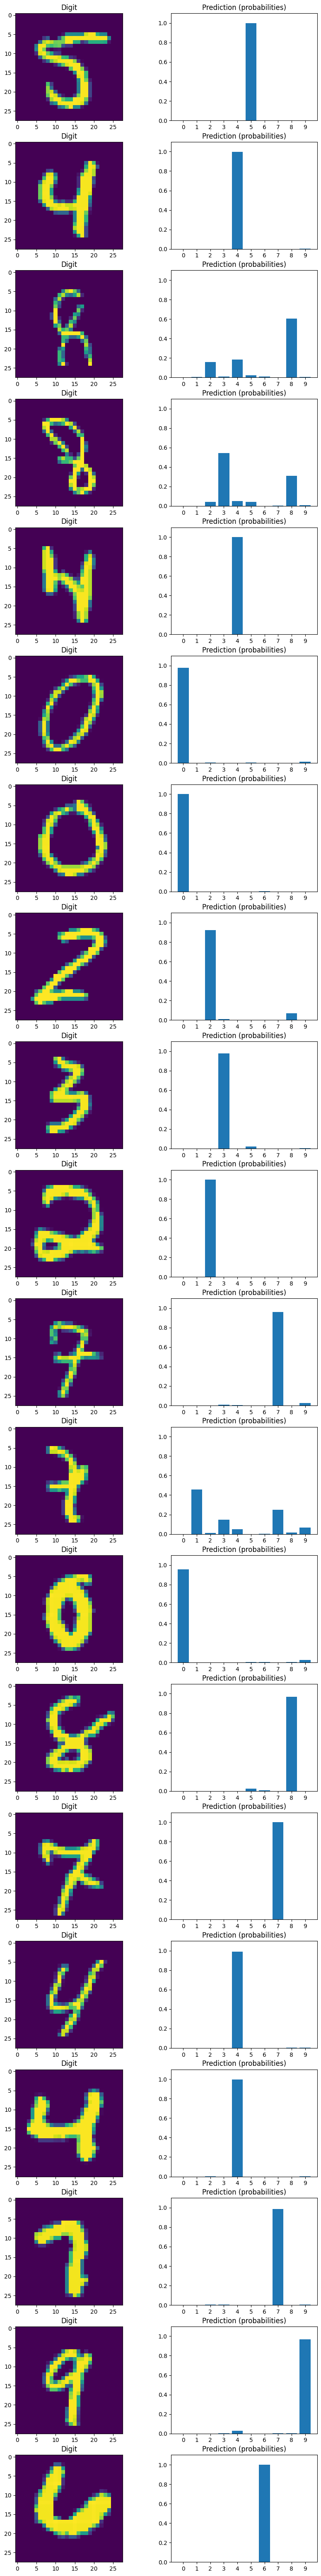

In [343]:
# Pour un gain de temps récupéré sur le cours
n = 27
inputs  = test_images_final[n*batch_size : (n+1)*batch_size,:].reshape(batch_size, 28, 28)
outputs = predictions[n*batch_size : (n+1)*batch_size,:]

f, ax = plt.subplots(batch_size,2, figsize=(10,4*batch_size))
for i in range(batch_size):
    ax[i,0].imshow(inputs[i,:,:])
    ax[i,0].set_title("Digit")
    ax[i,1].bar(range(10), outputs[i,:])
    ax[i,1].set_title("Prediction (probabilities)")
    ax[i,1].set_xticks(range(10))
    ax[i,1].set_ylim((0,1.1))
    
plt.show()


### 1.7 - Validation

In [344]:
test_loss, test_acc = network.evaluate(test_images_final, test_labels_oh)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1141 - accuracy: 0.9677
0.9677000045776367


## ===== Exercise =====

* We were using 1 hidden layer. Try to use more hidden layers, or no hidden layer at all, and see how it affects the test accuracy.
* Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
* Try to use the `mse` loss function instead of `categorical_crossentropy`.
* Try to use the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`.

These experiments will help convince you that the architecture choices we have made are all fairly reasonable, although they can still be improved!

---